In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_wages_male = pd.read_excel("employment/Wages_male.xls")
df_wages_female = pd.read_excel("employment/Wages_female.xls")
df_vulnerable_male = pd.read_excel("employment/Vulnerable_male.xls")
df_vulnerable_female = pd.read_excel("employment/Vulnerable_female.xls")
df_unemployment_15_male = pd.read_excel("employment/Unemployment_15_24_male.xls")
df_unemployment_15_female = pd.read_excel("employment/Unemployment_15_24_female.xls")
df_total_unemployment_male = pd.read_excel("employment/Total_Unemployment_male.xls")
df_total_unemployment_female = pd.read_excel("employment/Total_Unemployment_female.xls")
df_laborforce_male = pd.read_excel("employment/labor_force_participation_rate_male.xls")
df_laborforce_female = pd.read_excel("employment/labor_force_participation_rate_female.xls")
df_services_male = pd.read_excel("employment/Employment_services_male.xls")
df_services_female = pd.read_excel("employment/Employment_services_female.xls")
df_agriculture_male = pd.read_excel("employment/Employment_agriculture_male.xls")
df_agriculture_female = pd.read_excel("employment/Employment_agriculture_female.xls")
df_industry_male = pd.read_excel("employment/Employment_indusrty_male.xls")
df_industry_female = pd.read_excel("employment/Employment_indusrty_female.xls")
df_contributing_male = pd.read_excel("employment/Contributing_family _workers_male.xls")
df_contributing_female = pd.read_excel("employment/Contributing_family _workers_female.xls")
df_economy_types = pd.read_excel("employment/economy_types.xlsx")
df_employment_female = pd.read_excel("employment/EmploymentToPopulationRatio_15+_female.xls")
df_employment_male = pd.read_excel("employment/EmploymentToPopulationRatio_15+_male.xls")

In [4]:
uniq, counts = np.unique(df_economy_types['IncomeGroup'], return_counts=True)
for i in range(0,4):
    print(uniq[i],"-",counts[i]) 

High income - 60
Low income - 29
Lower middle income - 48
Upper middle income - 50


In [5]:
uniq, counts = np.unique(df_economy_types['Region'], return_counts=True)
for i in range(0,7):
    print(uniq[i],"-",counts[i]) 

East Asia & Pacific - 29
Europe & Central Asia - 49
Latin America & Caribbean - 31
Middle East & North Africa - 21
North America - 2
South Asia - 8
Sub-Saharan Africa - 47


In [12]:
dict_female = {'Country Name' : df_economy_types['TableName']}
dict_male = {'Country Name' : df_economy_types['TableName']}
dict_GenderEmploymentIndex = {'Country Name' : df_economy_types['TableName'], 'IncomeGroup' : df_economy_types['IncomeGroup'], 'Region' : df_economy_types['Region'] }

j, k = 1, 0
for i in range(30):
    
    #Creating the string representation of the year
    if(i <=8):
        year_str = '199'+str(j)
        j +=1
    elif (i >= 9 and i <= 18) :
        year_str = '200'+str(k)
        k +=1
    else:
        year_str = '20'+str(k)
        k +=1
    
    factor_wage = (df_wages_female[year_str]*df_employment_female[year_str])/(df_wages_male[year_str]*df_employment_male[year_str])
    factor_laborforce = df_laborforce_female[year_str]/df_laborforce_male[year_str]
    factor_services = (df_services_female[year_str]*df_employment_female[year_str])/(df_services_male[year_str]*df_employment_male[year_str])
    factor_agriculture = (df_agriculture_female[year_str]*df_employment_female[year_str])/(df_agriculture_male[year_str]*df_employment_male[year_str])
    factor_industry = (df_industry_female[year_str]*df_employment_female[year_str])/(df_industry_male[year_str]*df_employment_male[year_str])
    factor_employment = df_employment_female[year_str]/df_employment_male[year_str]
    
    ratio =   factor_industry   + factor_wage +\
            factor_services   + factor_agriculture
    
    dict_GenderEmploymentIndex[year_str] = ratio/6


#Creating the male, female and GEI dataframe 
df_female = pd.DataFrame(dict_female)
df_male = pd.DataFrame(dict_male)
df_GenderEmploymentIndex = pd.DataFrame(dict_GenderEmploymentIndex)
print(df_GenderEmploymentIndex.head(5))
df_GenderEmploymentIndex.to_csv (r'comboclustered_data.csv', index = None, header=True) 

           Country Name          IncomeGroup                      Region  \
0           Afghanistan           Low income                  South Asia   
1                Angola  Lower middle income          Sub-Saharan Africa   
2               Albania  Upper middle income       Europe & Central Asia   
3  United Arab Emirates          High income  Middle East & North Africa   
4             Argentina  Upper middle income   Latin America & Caribbean   

       1991      1992      1993      1994      1995      1996      1997  ...  \
0  0.092144  0.092613  0.092530  0.092824  0.093380  0.090890  0.089501  ...   
1  0.487972  0.485817  0.483522  0.483020  0.485473  0.487966  0.490866  ...   
2  0.450769  0.447394  0.437592  0.435524  0.431518  0.427364  0.436089  ...   
3  0.158207  0.161948  0.166138  0.166987  0.167579  0.170801  0.173960  ...   
4  0.319956  0.370668  0.341019  0.330497  0.329056  0.310093  0.313267  ...   

       2011      2012      2013      2014      2015      2016 

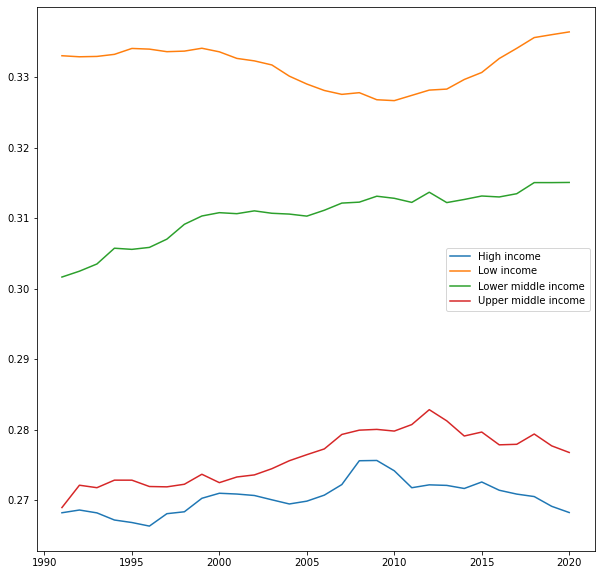

In [7]:
highincome= np.zeros(30)
lowincome= np.zeros(30)
lowmiddleincoem= np.zeros(30)
uppermiddleincome= np.zeros(30)
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('High income')
year=1990
i=0
for j in range(0,30):
            year= year+1
            highincome[i]= df2[str(year)].sum()/df2.shape[0]
            i=i+1
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('Low income')
year=1990
i=0
for j in range(0,30):
            year= year+1
            lowincome[i]= df2[str(year)].sum()/df2.shape[0]
            i=i+1
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('Lower middle income')
year=1990
i=0
for j in range(0,30):
            year= year+1
            lowmiddleincoem[i]= df2[str(year)].sum()/df2.shape[0]
            i=i+1
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('Upper middle income')
year=1990
i=0
for j in range(0,30):
            year= year+1
            uppermiddleincome[i]= df2[str(year)].sum()/df2.shape[0]
            i=i+1            
dff = pd.DataFrame({
   'High income': highincome,
   'Low income': lowincome,
   'Lower middle income' : lowmiddleincoem,
   'Upper middle income' : uppermiddleincome
   }, index=[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
dff.plot(figsize=(10,10));
#lines = dff.plot.line()

In [34]:
df_GenderEmploymentIndex['5yearaverage'] = df_GenderEmploymentIndex[['2016','2017','2018','2019','2020']].mean(axis=1)
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('Low income')
dflowmax= (df2.nlargest(5,['5yearaverage'])[['Country Name','5yearaverage']])
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('High income')
dfhighmax= (df2.nlargest(5,['5yearaverage'])[['Country Name','5yearaverage']])
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('Lower middle income')
dflowmiddlemax= (df2.nlargest(5,['5yearaverage'])[['Country Name','5yearaverage']])
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('Upper middle income')
dfhighmiddlemax= (df2.nlargest(5,['5yearaverage'])[['Country Name','5yearaverage']])

In [35]:
df_GenderEmploymentIndex['5yearaverage'] = df_GenderEmploymentIndex[['2016','2017','2018','2019','2020']].mean(axis=1)
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('Low income')
dflowmin= (df2.nsmallest(5,['5yearaverage'])[['Country Name','5yearaverage']])
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('High income')
dfhighmin= (df2.nsmallest(5,['5yearaverage'])[['Country Name','5yearaverage']])
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('Lower middle income')
dflowmiddlemin= (df2.nsmallest(5,['5yearaverage'])[['Country Name','5yearaverage']])
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('Upper middle income')
dfhighmiddlemin= (df2.nsmallest(5,['5yearaverage'])[['Country Name','5yearaverage']])

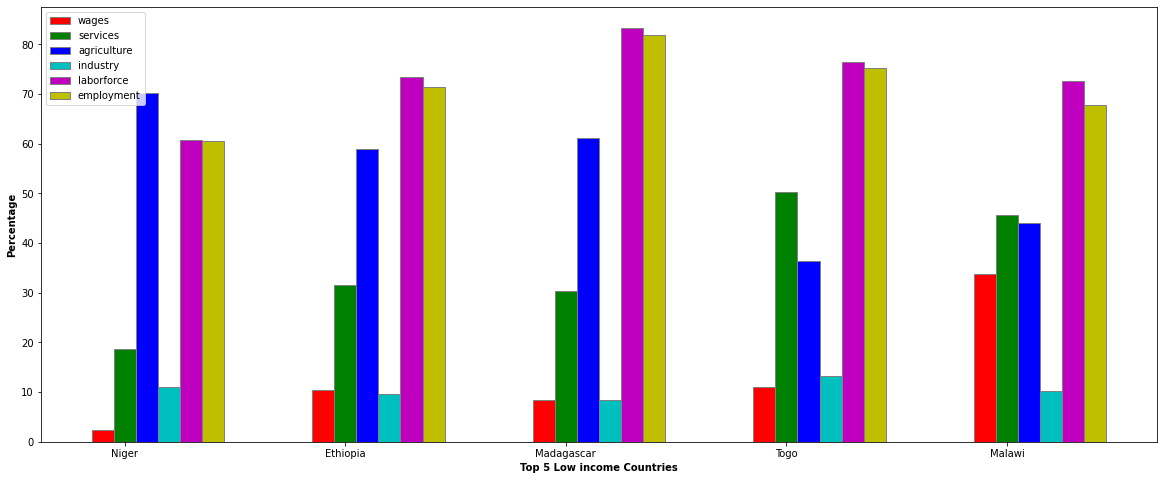

In [94]:
df_wages_female= df_wages_female.rename(columns = {'Country Name':'Country'})
df_services_female= df_services_female.rename(columns = {'Country Name':'Country'})
df_agriculture_female= df_agriculture_female.rename(columns = {'Country Name':'Country'}) 
df_industry_female= df_industry_female.rename(columns = {'Country Name':'Country'})
df_laborforce_female= df_laborforce_female.rename(columns = {'Country Name':'Country'})
df_employment_female= df_employment_female.rename(columns = {'Country Name':'Country'})
wage= np.zeros(5)
services= np.zeros(5)
agriculture= np.zeros(5)
industry= np.zeros(5)
laborforce= np.zeros(5)
employment= np.zeros(5)
for i in range(0,5):
    dfc= df_wages_female.loc[(df_wages_female.Country == dflowmax.iloc[i]['Country Name'] )]
    
    wage[i]= (dfc['2016'] +dfc['2017']+ dfc['2018'] + dfc['2019'] +dfc['2020']) /5
    dfc= df_services_female.loc[(df_services_female.Country == dflowmax.iloc[i]['Country Name'] )]
    services[i]= (dfc['2016'] +dfc['2017']+ dfc['2018'] + dfc['2019'] +dfc['2020']) /5
    dfc= df_agriculture_female.loc[(df_agriculture_female.Country == dflowmax.iloc[i]['Country Name'] )]
    agriculture[i]= (dfc['2016'] +dfc['2017']+ dfc['2018'] + dfc['2019'] +dfc['2020']) /5
    dfc= df_industry_female.loc[(df_industry_female.Country == dflowmax.iloc[i]['Country Name'] )]
    industry[i]= (dfc['2016'] +dfc['2017']+ dfc['2018'] + dfc['2019'] +dfc['2020']) /5
    dfc= df_laborforce_female.loc[(df_laborforce_female.Country == dflowmax.iloc[i]['Country Name'] )]
    laborforce[i]= (dfc['2016'] +dfc['2017']+ dfc['2018'] + dfc['2019'] +dfc['2020']) /5
    dfc= df_employment_female.loc[(df_employment_female.Country == dflowmax.iloc[i]['Country Name'] )]
    employment[i]= (dfc['2016'] +dfc['2017']+ dfc['2018'] + dfc['2019'] +dfc['2020']) /5
dflowmax['wages'] = wage 
dflowmax['services'] = services
dflowmax['agriculture'] = agriculture
dflowmax['industry'] = industry
dflowmax['laborforce'] = laborforce
dflowmax['employment'] = employment
#print(dflowmax)    
import matplotlib.pyplot as plt


barWidth = 0.1
fig = plt.subplots(figsize =(20, 8))
br1 = np.arange(len(dflowmax)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 
br5 = [x + barWidth for x in br4] 
br6 = [x + barWidth for x in br5] 
    
# Make the plot 
plt.bar(br1, dflowmax['wages'], color ='r', width = barWidth, 
        edgecolor ='grey', label ='wages') 
plt.bar(br2, dflowmax['services'], color ='g', width = barWidth, 
        edgecolor ='grey', label ='servcies') 
plt.bar(br3, dflowmax['agriculture'], color ='b', width = barWidth, 
        edgecolor ='grey', label ='agriculture') 
plt.bar(br4, dflowmax['industry'], color ='c', width = barWidth, 
        edgecolor ='grey', label ='industry') 
plt.bar(br5, dflowmax['laborforce'], color ='m', width = barWidth, 
        edgecolor ='grey', label ='laborforce') 
plt.bar(br6, dflowmax['employment'], color ='y', width = barWidth, 
        edgecolor ='grey', label ='employment') 
   
# Adding Xticks  
plt.xlabel('Top 5 Low income Countries', fontweight ='bold') 
plt.ylabel('Percentage', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(dflowmax))], 
           dflowmax['Country Name']) 
plt.legend(['wages','services','agriculture','industry','laborforce','employment'],loc=2)

   
plt.show() 



    Country Name  5yearaverage     wages  services  agriculture  industry  \
120        Niger      1.046050  0.291003  1.130446     0.888256  2.516751   
53      Ethiopia      1.010053  0.674886  1.951459     0.799850  0.938603   
104   Madagascar      0.943594  0.624150  1.349180     0.895132  0.921648   
162         Togo      0.907765  0.479852  1.066216     0.904715  1.055603   
116       Malawi      0.883562  0.755063  1.184802     0.994706  0.598159   

     laborforce  employment  
120    0.724246    0.725599  
53     0.853271    0.842249  
104    0.936303    0.935154  
162    0.965195    0.975008  
116    0.893227    0.875414  


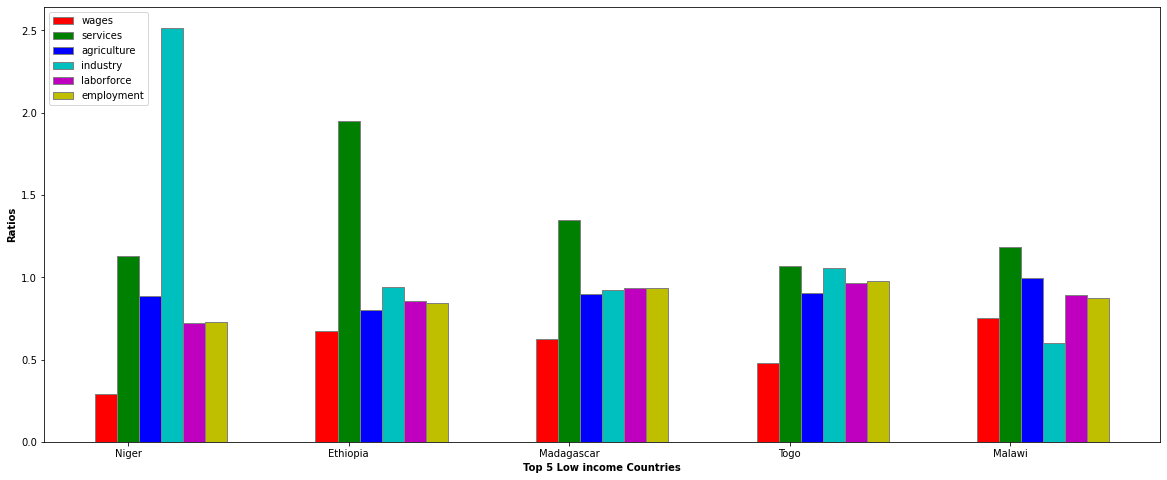

In [100]:
df_wages_female= df_wages_female.rename(columns = {'Country Name':'Country'})
df_services_female= df_services_female.rename(columns = {'Country Name':'Country'})
df_agriculture_female= df_agriculture_female.rename(columns = {'Country Name':'Country'}) 
df_industry_female= df_industry_female.rename(columns = {'Country Name':'Country'})
df_laborforce_female= df_laborforce_female.rename(columns = {'Country Name':'Country'})
df_employment_female= df_employment_female.rename(columns = {'Country Name':'Country'})
df_wages_male= df_wages_male.rename(columns = {'Country Name':'Country'})
df_services_male= df_services_male.rename(columns = {'Country Name':'Country'})
df_agriculture_male= df_agriculture_male.rename(columns = {'Country Name':'Country'}) 
df_industry_male= df_industry_male.rename(columns = {'Country Name':'Country'})
df_laborforce_male= df_laborforce_male.rename(columns = {'Country Name':'Country'})
df_employment_male= df_employment_male.rename(columns = {'Country Name':'Country'})
wage= np.zeros(5)
services= np.zeros(5)
agriculture= np.zeros(5)
industry= np.zeros(5)
laborforce= np.zeros(5)
employment= np.zeros(5)
for i in range(0,5):
    dfc= df_wages_female.loc[(df_wages_female.Country == dflowmax.iloc[i]['Country Name'] )]
    dfc2= df_wages_male.loc[(df_wages_male.Country == dflowmax.iloc[i]['Country Name'] )]
    wage[i]= ((dfc['2016']/dfc2['2016']) +(dfc['2017']/dfc2['2017'])+ (dfc['2018']/dfc2['2018']) + (dfc['2019']/dfc2['2019']) +(dfc['2020']/dfc2['2020'])) /5
    dfc= df_services_female.loc[(df_services_female.Country == dflowmax.iloc[i]['Country Name'] )]
    dfc2= df_services_male.loc[(df_services_male.Country == dflowmax.iloc[i]['Country Name'] )]
    services[i]= ((dfc['2016']/dfc2['2016']) +(dfc['2017']/dfc2['2017'])+ (dfc['2018']/dfc2['2018']) + (dfc['2019']/dfc2['2019']) +(dfc['2020']/dfc2['2020'])) /5
    dfc= df_agriculture_female.loc[(df_agriculture_female.Country == dflowmax.iloc[i]['Country Name'] )]
    dfc2= df_agriculture_male.loc[(df_agriculture_male.Country == dflowmax.iloc[i]['Country Name'] )]
    agriculture[i]= ((dfc['2016']/dfc2['2016']) +(dfc['2017']/dfc2['2017'])+ (dfc['2018']/dfc2['2018']) + (dfc['2019']/dfc2['2019']) +(dfc['2020']/dfc2['2020'])) /5
    dfc= df_industry_female.loc[(df_industry_female.Country == dflowmax.iloc[i]['Country Name'] )]
    dfc2= df_industry_male.loc[(df_industry_male.Country == dflowmax.iloc[i]['Country Name'] )]
    industry[i]= ((dfc['2016']/dfc2['2016']) +(dfc['2017']/dfc2['2017'])+ (dfc['2018']/dfc2['2018']) + (dfc['2019']/dfc2['2019']) +(dfc['2020']/dfc2['2020'])) /5
    dfc= df_laborforce_female.loc[(df_laborforce_female.Country == dflowmax.iloc[i]['Country Name'] )]
    dfc2= df_laborforce_male.loc[(df_laborforce_male.Country == dflowmax.iloc[i]['Country Name'] )]
    laborforce[i]= ((dfc['2016']/dfc2['2016']) +(dfc['2017']/dfc2['2017'])+ (dfc['2018']/dfc2['2018']) + (dfc['2019']/dfc2['2019']) +(dfc['2020']/dfc2['2020'])) /5
    dfc= df_employment_female.loc[(df_employment_female.Country == dflowmax.iloc[i]['Country Name'] )]
    dfc2= df_employment_male.loc[(df_employment_male.Country == dflowmax.iloc[i]['Country Name'] )]
    employment[i]= ((dfc['2016']/dfc2['2016']) +(dfc['2017']/dfc2['2017'])+ (dfc['2018']/dfc2['2018']) + (dfc['2019']/dfc2['2019']) +(dfc['2020']/dfc2['2020'])) /5
dflowmax['wages'] = wage 
dflowmax['services'] = services
dflowmax['agriculture'] = agriculture
dflowmax['industry'] = industry
dflowmax['laborforce'] = laborforce
dflowmax['employment'] = employment
print(dflowmax)    
import matplotlib.pyplot as plt


barWidth = 0.1
fig = plt.subplots(figsize =(20, 8))
br1 = np.arange(len(dflowmax)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 
br5 = [x + barWidth for x in br4] 
br6 = [x + barWidth for x in br5] 
    
# Make the plot 
plt.bar(br1, dflowmax['wages'], color ='r', width = barWidth, 
        edgecolor ='grey', label ='wages') 
plt.bar(br2, dflowmax['services'], color ='g', width = barWidth, 
        edgecolor ='grey', label ='servcies') 
plt.bar(br3, dflowmax['agriculture'], color ='b', width = barWidth, 
        edgecolor ='grey', label ='agriculture') 
plt.bar(br4, dflowmax['industry'], color ='c', width = barWidth, 
        edgecolor ='grey', label ='industry') 
plt.bar(br5, dflowmax['laborforce'], color ='m', width = barWidth, 
        edgecolor ='grey', label ='laborforce') 
plt.bar(br6, dflowmax['employment'], color ='y', width = barWidth, 
        edgecolor ='grey', label ='employment') 
   
# Adding Xticks  
plt.xlabel('Top 5 Low income Countries', fontweight ='bold') 
plt.ylabel('Ratios', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(dflowmax))], 
           dflowmax['Country Name']) 
plt.legend(['wages','services','agriculture','industry','laborforce','employment'],loc=2)

   
plt.show() 

